Setup packages

In [1]:
import numpy as np
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "/Users/billdeng/anaconda3/envs/de_novo/bin/python"
  * The NumPy version is: "1.22.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libopenblas.dylib
  Referenced from: /Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so
  Reason: tried: '/Users/billdeng/anaconda3/envs/de_novo/lib/libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/lib/libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/numpy/core/../../../../libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/lib/libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/lib/libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/lib/python3.10/site-packages/numpy/core/../../../../libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/bin/../lib/libopenblas.dylib' (no such file), '/Users/billdeng/anaconda3/envs/de_novo/bin/../lib/libopenblas.dylib' (no such file), '/usr/local/lib/libopenblas.dylib' (no such file), '/usr/lib/libopenblas.dylib' (no such file)


Setup Evironment

In [2]:
class CircleEnv:
    def __init__(self):
        self.position = 0
        self.target_area = (-0.5, 0.5)
        self.step_size = 0.05
        self.borders = (-10, 10)

    def reset(self):
        self.position = random.uniform(self.borders[0], self.borders[1])
        return self.position

    def step(self, action):
        reward = 0
        done = False
        old_position = self.position
        if action == 0: # Move left
            self.position = max(self.position - self.step_size, self.borders[0])
        elif action == 1: # Move right
            self.position = min(self.position + self.step_size, self.borders[1])

        if abs(old_position) > abs(self.position): # If we moved closer to the center
            reward += 0.05
        elif abs(old_position) < abs(self.position): # If we moved further from the center
            reward -= -0.05
        
        if self.target_area[0] <= self.position <= self.target_area[1]:
            reward += 10
            done = True
        else:
            reward += -0.1 # Small cost for steps

        return self.position, reward, done



The agent

In [3]:

class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount factor
        self.epsilon = epsilon # exploration rate
        self.q_values = defaultdict(lambda: [0, 0, 0]) # 3 actions: left, right, no action

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.choice([0, 1, 2])
        else:
            return max(range(3), key=lambda a: self.q_values[state][a])

    def update(self, state, action, reward, next_state):
        next_action = self.select_action(next_state)
        self.q_values[state][action] = (1 - self.alpha) * self.q_values[state][action] \
            + self.alpha * (reward + self.gamma * self.q_values[next_state][next_action])


Run episodes 

In [4]:
def train(agent, env, episodes=10000):
    for episode in range(episodes):
        state = env.reset()
        state = int(state // 0.05) # Discretize the continuous state space
        done = False
        total_reward = 0

        while not done:
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            next_state = int(next_state // 0.05) # Discretize the continuous state space
            agent.update(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")

# Create environment and agent instances
env = CircleEnv()
agent = QLearningAgent()

# Train the agent
train(agent, env)


Episode 100: Total Reward: 4.400000000000011
Episode 200: Total Reward: -21.450000000000305
Episode 300: Total Reward: -13.000000000000188
Episode 400: Total Reward: 3.9500000000000144
Episode 500: Total Reward: 4.600000000000012
Episode 600: Total Reward: -16.40000000000024
Episode 700: Total Reward: 5.350000000000009
Episode 800: Total Reward: 10.05
Episode 900: Total Reward: 10.05
Episode 1000: Total Reward: 2.050000000000021
Episode 1100: Total Reward: 1.20000000000001
Episode 1200: Total Reward: 0.19999999999999574
Episode 1300: Total Reward: 3.6500000000000155
Episode 1400: Total Reward: 2.5000000000000195
Episode 1500: Total Reward: 10.05
Episode 1600: Total Reward: 9.350000000000001
Episode 1700: Total Reward: -5.650000000000087
Episode 1800: Total Reward: 6.250000000000006
Episode 1900: Total Reward: 6.050000000000007
Episode 2000: Total Reward: -2.30000000000004
Episode 2100: Total Reward: -17.250000000000252
Episode 2200: Total Reward: 6.300000000000006


KeyboardInterrupt: 

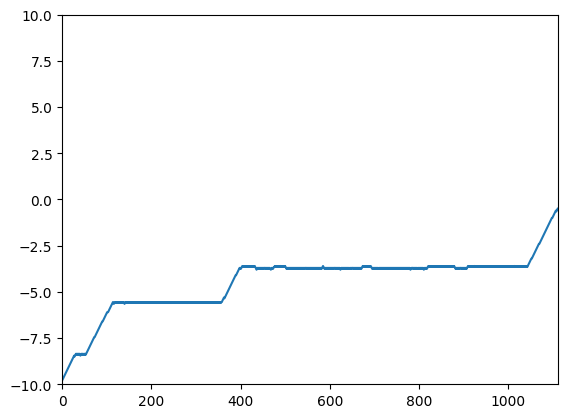

In [ ]:

def visualize_policy(agent, env):
    state = env.reset()
    state = int(state // 0.05) # Discretize the continuous state space
    positions = [state * 0.05] # Storing positions to plot later

    plt.figure(figsize=(10, 5))
    plt.axhline(y=0.5, color='r', linestyle='--')
    plt.axhline(y=-0.5, color='r', linestyle='--')
    plt.xlabel("Timestep")
    plt.ylabel("Position")
    plt.title("Visualization of Best Policy")

    done = False
    while not done:
        action = agent.select_action(state) # Choose the best action according to learned Q-values
        next_state, _, done = env.step(action)
        next_state = int(next_state // 0.05)
        positions.append(next_state * 0.05)
        state = next_state
        
        plt.plot(positions)
        plt.xlim([0, len(positions)])
        plt.ylim([-10, 10])
        clear_output(wait=True) # Clear the previous plot in the Jupyter cell
        plt.show()

visualize_policy(agent, env)
